<a href="https://colab.research.google.com/github/StevenChen0603/cs666student/blob/main/CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

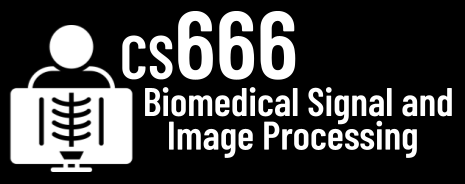
#Assignment 4

In [543]:
# NAME: Peng-Lin Chen

In [544]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [545]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [546]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [547]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [548]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
!wget https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1

--2024-04-04 23:45:43--  https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2ca2889o2ql8n4e/xray.zip [following]
--2024-04-04 23:45:43--  https://www.dropbox.com/s/dl/2ca2889o2ql8n4e/xray.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0254cd750fc86de95a246a2541.dl.dropboxusercontent.com/cd/0/get/CQZOJ0vYlcPrU8prAFtneK2bqxxKft1dEjBS_N7Msd9_GX4RC3n_2r6ihQHR8EzCHIbqsv7kJppsC9k1vH8bCQ4yiIKc5h-4Dpj29HOcBQInhyi7jj2Lja1jw93Ppd-Nstmx2pi7KDncqE36gcYTy9gW/file?dl=1# [following]
--2024-04-04 23:45:43--  https://uc0254cd750fc86de95a246a2541.dl.dropboxusercontent.com/cd/0/get/CQZOJ0vYlcPrU8prAFtneK2bqxxKft1dEjBS_N7Msd9_GX4RC3n_2r6ihQHR8EzCHIbqsv7kJppsC9k1vH8bCQ4yiIKc5h-4Dpj29HOcBQInhyi7

In [549]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [550]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [551]:
# TODO: Please display this image and print the dimensions!

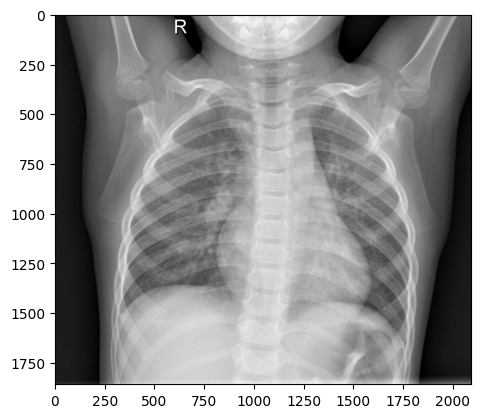

Image dimensions: (1858, 2090)


In [552]:
# TODO: YOUR CODE
plt.imshow(img, cmap='gray')
plt.show()
# Print the dimensions
print("Image dimensions:", img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [553]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [554]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) Data loading and preprocessing which are loading image data from directories, reading the images, converting them to grayscale (if necessary), and resizing them.
# TODO: Operation 2) Data structuring which are line 2 initialization of the data list, which will hold the processed image data
# and line 6 Initialization of NumPy arrays within the data list for each category of images (NORMAL, PNEUMONIA, and COVID).
# TODO: Operation 3) Data filling which is Line 15: Filling the processed image data into the initialized NumPy arrays.
# Specifically, the line data[f_index][i, 0:img_shape[0], 0:img_shape[1]] = loaded_image assigns the processed image to the appropriate index in the NumPy array corresponding to its category.

In [555]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

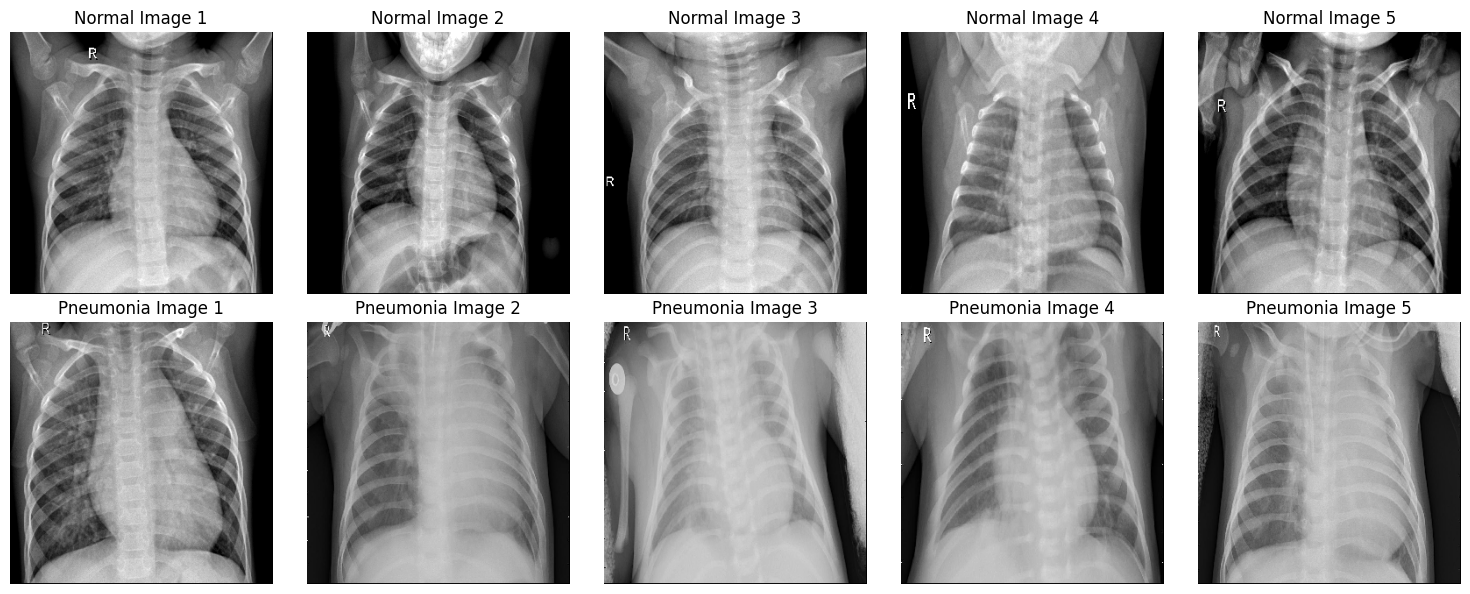

In [556]:
# TODO: YOUR CODE
num_images = 5

# Create a figure with two rows of subplots
fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

# Display the first 5 normal images
for i in range(num_images):
    axes[0, i].imshow(data[0][i], cmap='gray')
    axes[0, i].set_title('Normal Image {}'.format(i + 1))
    axes[0, i].axis('off')

# Display the first 5 pneumonia images
for i in range(num_images):
    axes[1, i].imshow(data[1][i], cmap='gray')
    axes[1, i].set_title('Pneumonia Image {}'.format(i + 1))
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [557]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [558]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [559]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_train = np.zeros(TRAINING_COUNT * 3, dtype=np.float32)

# Assign labels for normal, pneumonia, and COVID images
y_train[:TRAINING_COUNT] = 0  # Label 0 for normal
y_train[TRAINING_COUNT:2*TRAINING_COUNT] = 1  # Label 1 for pneumonia
y_train[2*TRAINING_COUNT:] = 2  # Label 2 for covid

In [560]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [561]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_test = np.zeros(TESTING_COUNT * 3, dtype=np.float32)

# Assign labels for normal, pneumonia, and COVID images
y_test[:TESTING_COUNT] = 0  # Label 0 for normal
y_test[TESTING_COUNT:2*TESTING_COUNT] = 1  # Label 1 for pneumonia
y_test[2*TESTING_COUNT:] = 2  # Label 2 for covid

**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [562]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [563]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [564]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [565]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [566]:
# TODO: YOUR ANSWER
# It's an machine learning algorithm which create many decision trees during training.
#　Each tree in the forest is built using a random subset of the training data and a random subset of features.
# Then, it will combine the predictions from the trees to make the final prediction, reudcing overfitting and improving accuracy.

In [567]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

0.8333333333333334

In [568]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [569]:
# TODO: YOUR ANSWER
# The result is pretty accurate. I'm suprised that this algorithm can do it that well.

**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [570]:
# How many trees are used in Task 4?

In [571]:
# TODO: YOUR ANSWER
# Since the fucntion RandomForestClassifier() default trees number is 100, the number of trees are used is 100.
print(clf.n_estimators)

100


In [572]:
# Now, please use a single tree and observe the testing performance.

In [573]:
# TODO: YOUR CODE
from sklearn.tree import DecisionTreeClassifier

clf_single_tree = RandomForestClassifier(n_estimators=1)
clf_single_tree.fit(X_train, y_train)
classification_accuracy_single_tree = clf_single_tree.score(X_test, y_test)

# Print the classification accuracy
print("Classification Accuracy with a Single Decision Tree:", classification_accuracy_single_tree)

Classification Accuracy with a Single Decision Tree: 0.725


In [574]:
# Are you surprised?

In [575]:
# TODO: YOUR ANSWER
# Yeah, I'm surprised that even we only use signal tree is still not bad.

**Bonus:** Let's take a closer look! [33 Points]

In [576]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [577]:
# TODO: YOUR CODE AND YOUR ANSWER
# Select the remaining 99 COVID images
remaining_covid_images_counts = 99
X_test_covid_only = np.zeros((remaining_covid_images_counts, 300*300), dtype=np.float32)
t_pos = 0

for image in data[2][TRAINING_COUNT + TESTING_COUNT:]:
  image = image.ravel()
  image /= image.max()
  X_test_covid_only[t_pos] = image
  t_pos += 1

y_covid_image = np.full(remaining_covid_images_counts, 2)

remaining_covid_accuracy = clf.score(X_test_covid_only, y_covid_image)
print("Accuracy on the remaining COVID images:", remaining_covid_accuracy)

Accuracy on the remaining COVID images: 0.9090909090909091


In [578]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

[10 17 24 30 37 53 54 93 97]


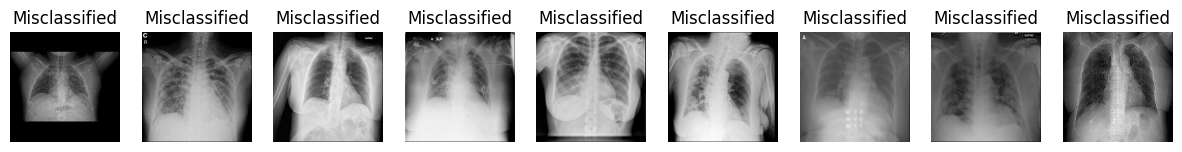

In [579]:
# TODO: YOUR CODE AND YOUR ANSWER
predictions = clf.predict(X_test_covid_only)
misclassified_indices = np.where(predictions != 2)[0]
fig, axes = plt.subplots(1, len(misclassified_indices), figsize=(15, 6))
print(misclassified_indices)
for i, index in enumerate(misclassified_indices):
    axes[i].imshow(remaining_covid_images[index], cmap='gray')
    axes[i].set_title('Misclassified')
    axes[i].axis('off')

plt.show()

In [580]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw